## Case Study - Shoes price prediction

### Objective:

Predicting shoes price for the customers of Zshoes.

### Problem Statement:

Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import scipy as sp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate

#### Importing Data Set

In [74]:
df = pd.read_csv('product_data.csv')

In [75]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [76]:
df.shape

(101335, 7)

In [77]:
df.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type              int64
payment_installments      int64
payment_value           float64
dtype: object

Payment Type is categorical feature. We need to convert it.

In [78]:
df['payment_type'] = df['payment_type'].astype('object')

Lets check the data types again.

In [79]:
df.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Order item Id is insignificant. Let's drop it.

In [80]:
df = df.drop('order_item_id', axis = 1)

#### Let's see if we have any missing values.

In [81]:
Total = df.isnull().sum().sort_values(ascending=False)  
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
payment_value,0,0.0
payment_installments,0,0.0
payment_type,0,0.0
payment_sequential,0,0.0
freight_value,0,0.0
price,0,0.0


There are no missing values!!!

### Split the dependent and independent variables

In [82]:

df_target = df['price']
df_feature = df.drop('price', axis = 1)

### Separating numerical and categorical variables.

In [83]:

df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['freight_value', 'payment_sequential', 'payment_installments',
       'payment_value'],
      dtype='object')

In [84]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

Index(['payment_type'], dtype='object')

#### Dummy encoding of Cateogrical Variables

In [85]:
#dummy encoding
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

### Scaling of Numerical Variables

In [86]:

X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

y = (df_target - df_target.mean()) / df_target.std()

### Concatenate scaled numerical and dummy encoded categorical variables.

In [87]:

X = pd.concat([df_num_scaled, dummy_var], axis = 1)

X.head()

,freight_value,payment_sequential,payment_installments,payment_value,payment_type_2,payment_type_3,payment_type_4
0,-0.477304,-0.129873,-0.266094,-0.417421,0,0,0
1,0.639938,-0.129873,0.130054,1.090727,0,0,0
2,0.293324,-0.129873,0.922350,0.745438,0,0,0
3,-0.561433,-0.129873,-0.266094,-0.790440,0,0,0
4,0.338754,-0.129873,0.130054,0.754842,0,0,0


### Data Visualization

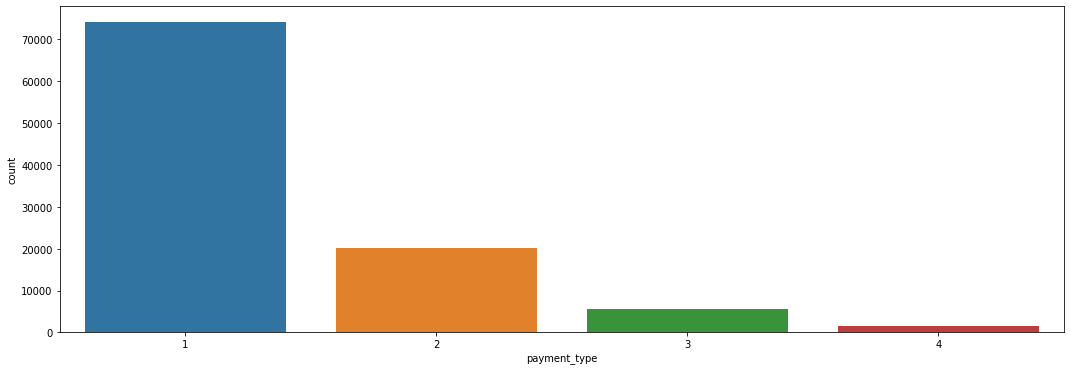

In [111]:
plt.figure(figsize=(18,6))
sns.countplot(x = df_cat['payment_type'])
plt.show()

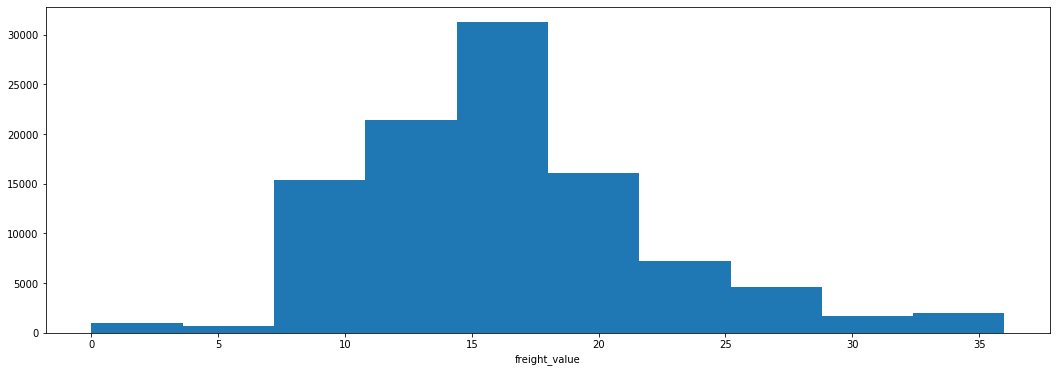

In [112]:
plt.figure(figsize=(18,6))
plt.hist(data=df, x="freight_value")
plt.xlabel('freight_value')
plt.show()

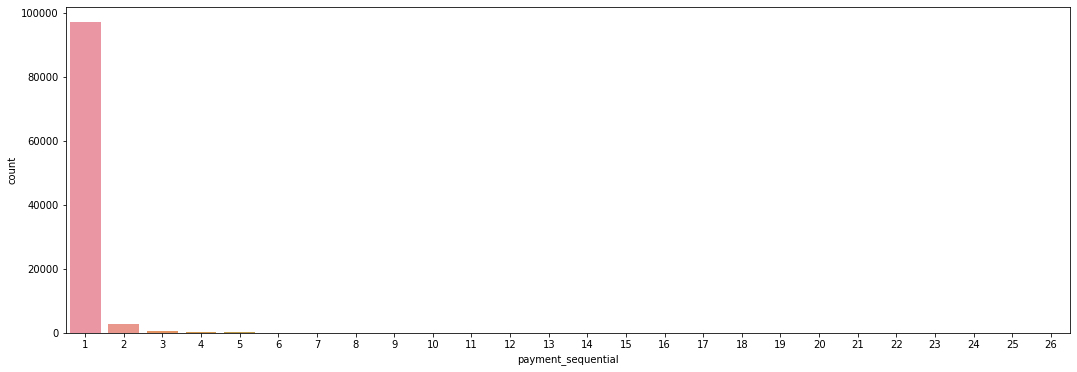

In [113]:
plt.figure(figsize=(18,6))
sns.countplot(df["payment_sequential"])

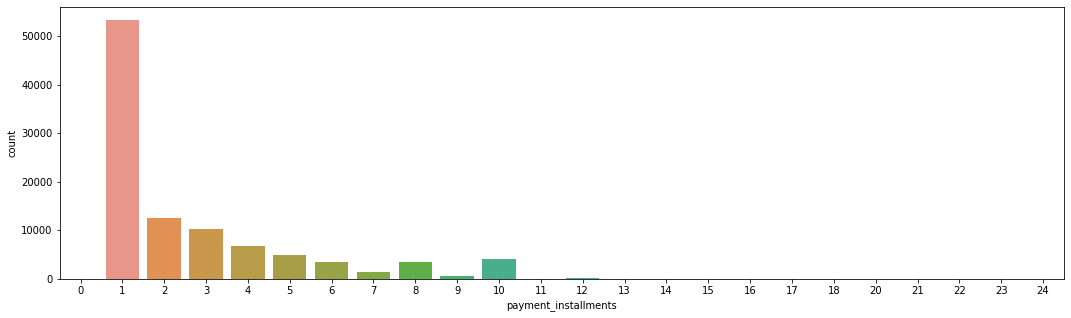

In [118]:
plt.figure(figsize=(18,))
sns.countplot(df["payment_installments"])

### Correlation between features

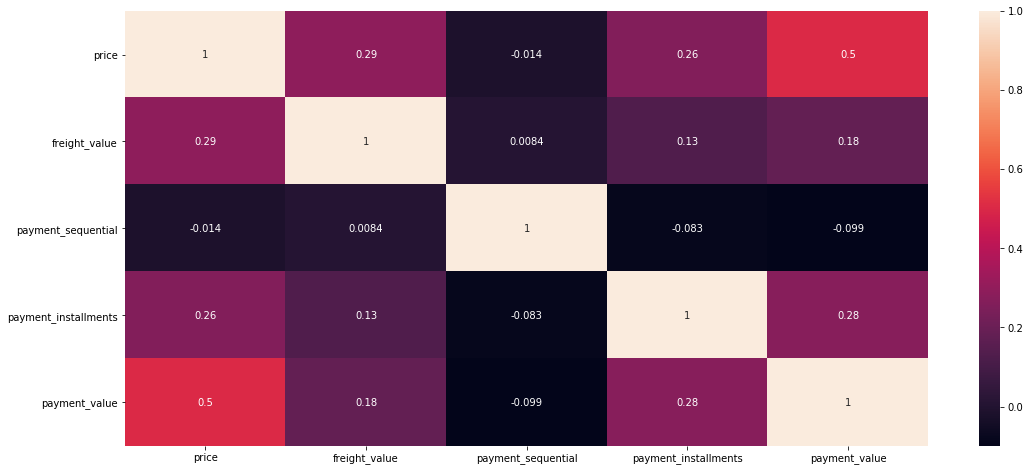

In [115]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

### Train Test Split

In [93]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)


print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (70934, 7)
y_train (70934,)
X_test (30401, 7)
y_test (30401,)


### Benchmarking

The initial benchmarking will be made by looking at three different metrics used for estimating errors, as well as one statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. These are:

Error Metrics:

Mean Absolute Error (MAE)


Root Mean Squared Error (RMSE)

Model Valuation Metric (robustness of the model):

R-squared (R^2)

### Linear Regression

In [128]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [129]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.6217387362333874
RMSE:  0.8294019866218859
R^2: 0.31120461678083444


### KNN Regressor

In [130]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [131]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.30508192875621354
RMSE:  0.5785483461853519
R^2: 0.6648498655861514


In [132]:
knn = KNeighborsRegressor()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
scores = ['r2','neg_mean_absolute_error','neg_mean_squared_error']
knn_model = cross_validate(knn,X,y,cv=kfold,scoring=scores)


print('MAE:',np.mean(np.abs(knn_model['test_neg_mean_absolute_error'])))
print('RSME:',np.mean(np.sqrt(np.abs(knn_model['test_neg_mean_squared_error']))))
print('r2:',knn_model['test_r2'].mean())

MAE: 0.2934906084686574
RSME: 0.5669057260088195
r2: 0.6785488926753347


### XGBoost

In [133]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [134]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.2938279340419469
RMSE:  0.5000440660025565
R^2: 0.749633256373362


In [135]:
xgb = XGBRegressor()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
scores = ['r2','neg_mean_absolute_error','neg_mean_squared_error']
xgb_model = cross_validate(xgb,X,y,cv=kfold,scoring=scores)


print('MAE:',np.mean(np.abs(xgb_model['test_neg_mean_absolute_error'])))
print('RMSE:',np.mean(np.sqrt(np.abs(xgb_model['test_neg_mean_squared_error']))))
print('r^2:',xgb_model['test_r2'].mean())

MAE: 0.2925315938251695
RMSE: 0.4951245261448191
r^2: 0.7547804655003911


### Decision Tree

In [98]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [99]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.15091976414793773
MSE:  0.242918038807776
RMSE:  0.4928671614215903
R^2: 0.7567684814742202


In [126]:
dt = DecisionTreeRegressor()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
scores = ['r2','neg_mean_absolute_error','neg_mean_squared_error']
dt_model = cross_validate(dt,X,y,cv=kfold,scoring=scores)

print('MAE:',np.mean(np.abs(dt_model['test_neg_mean_absolute_error'])))
print('RMSE:',np.mean(np.sqrt(np.abs(dt_model['test_neg_mean_squared_error']))))
print('r^2:',dt_model['test_r2'].mean())


MAE: 0.1405469047327471
RMSE: 0.47683058502611403
r^2: 0.7725939467082098


### Random Forest

In [100]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [101]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.17243977632870328
MSE:  0.15249765562643555
RMSE:  0.39050948212103065
R^2: 0.8473055499225775


In [127]:
rf = RandomForestRegressor()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
scores = ['r2','neg_mean_absolute_error','neg_mean_squared_error']
rf_model = cross_validate(rf,X,y,cv=kfold,scoring=scores)


print('MAE:',np.mean(np.abs(rf_model['test_neg_mean_absolute_error'])))
print('RMSE:',np.mean(np.sqrt(np.abs(rf_model['test_neg_mean_squared_error']))))
print('r^2:',rf_model['test_r2'].mean())

MAE: 0.16142175038712267
RMSE: 0.3743252708575469
r^2: 0.8598527030287688


### Result

Linear Regression 

MAE:  0.6217387362333874

RMSE:  0.8294019866218859

R^2: 0.31120461678083444

KNN Regressor 

MAE: 0.2934906084686574

RSME: 0.5669057260088195

r2: 0.6785488926753347
    
XGBoost

MAE: 0.2925315938251695

RMSE: 0.4951245261448191

r^2: 0.7547804655003911
    
Decision Tree

MAE: 0.1405469047327471

RMSE: 0.47683058502611403

r^2: 0.7725939467082098
    
Random Forest

 MAE: 0.16142175038712267
 
RMSE: 0.3743252708575469

r^2: 0.8598527030287688   


### Conclusion 

Random Forest is having highest r squared value which is 0.85.
Random Forest is chosen as final model.
